___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.shape

(17414, 10)

### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.drop_duplicates().shape

(17414, 10)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(17414, 10)

False    17414
dtype: int64

In [7]:
df.isna().sum()  # isna() numpy kütüphanesindeki null değerleri çıkarıyor.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.isnull().sum()  # isnull() are not considered NA values.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

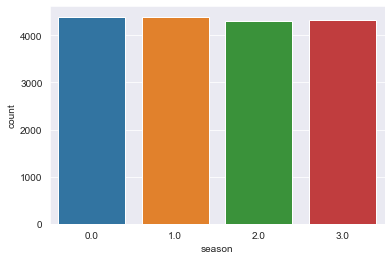

In [9]:
# season
sns.countplot(data = df, x = "season");

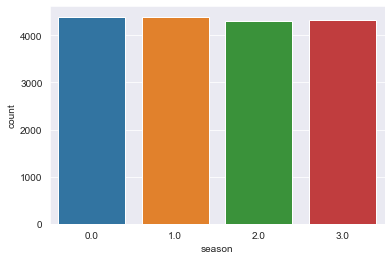

In [14]:
# season


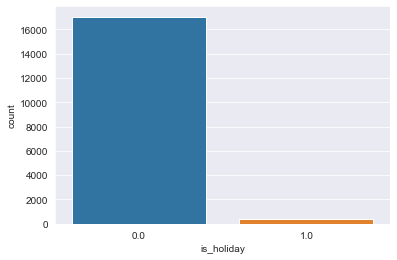

In [10]:
# is_holiday
sns.countplot(data = df, x = "is_holiday");

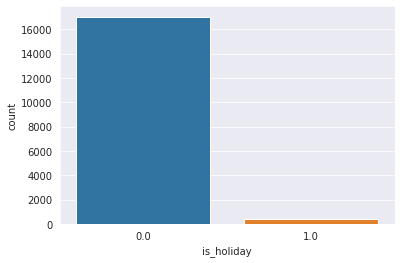

In [ ]:
# is_holiday


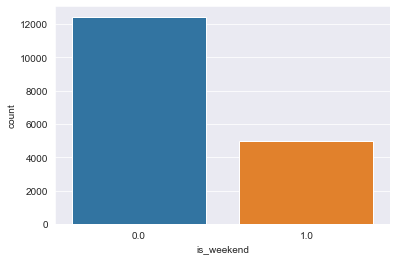

In [11]:
# is_weekend
sns.countplot(data = df, x = "is_weekend");

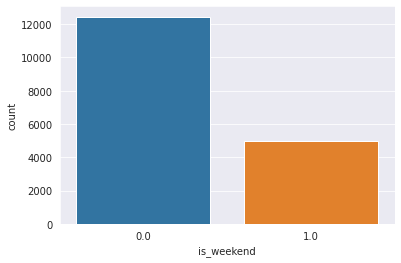

In [ ]:
# is_weekend


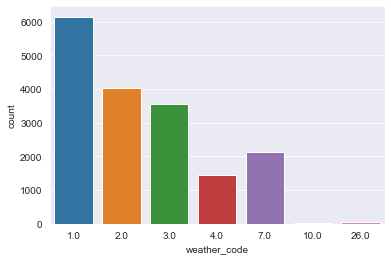

In [12]:
# weather_code
sns.countplot(data = df, x = "weather_code");

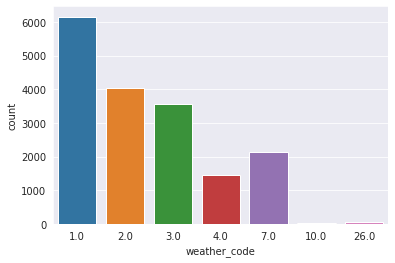

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [13]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [14]:
df.timestamp = pd.to_datetime(df.timestamp)

In [15]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [16]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [17]:
df["year_month"] = df.index.strftime("%Y-%m")

In [18]:
df["year"] = df.index.strftime("%Y").astype("int64")

In [19]:
df["month"] = df.index.strftime("%m").astype("int64")

In [20]:
df["day_of_month"] = df.index.strftime("%d").astype("int64")

In [21]:
df.index.weekday

Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='timestamp', length=17414)

In [22]:
df["day_of_week"] = df.index.weekday.astype("int64")

In [23]:
df["hour"] = df.index.strftime("%H").astype("int64")

In [24]:
df.head(30)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4
2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,5
2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015-01,2015,1,4,6,6
2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015-01,2015,1,4,6,7
2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015-01,2015,1,4,6,8


In [25]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

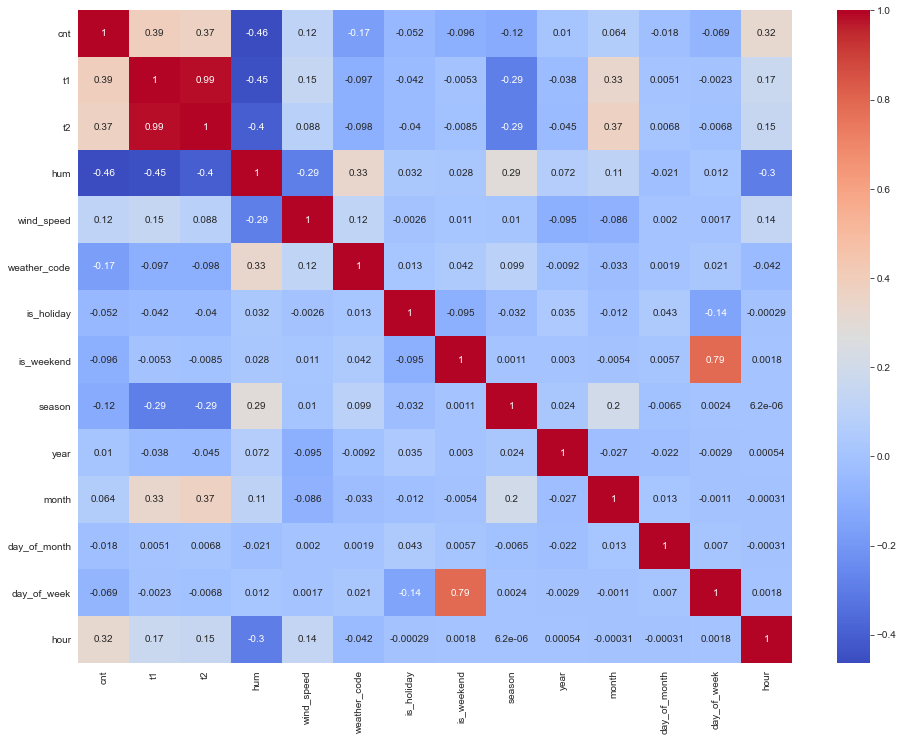

In [26]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap= "coolwarm");

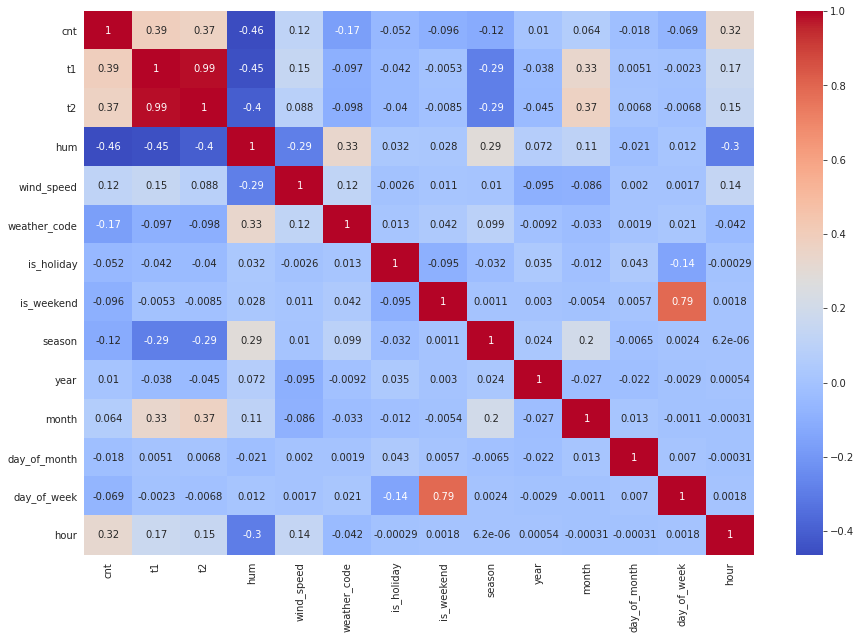

In [ ]:
# for all variables 


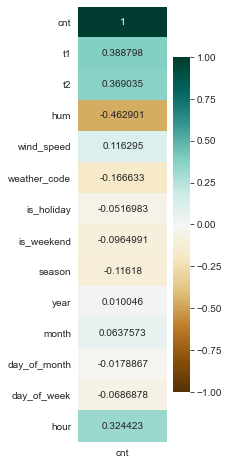

In [173]:
# for the target variable
plt.figure(figsize=(2,8));
x = df.corr().loc[:,['cnt']]
sns.heatmap(data = x, annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt="g");

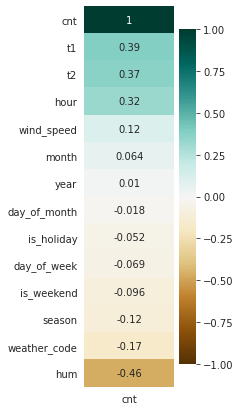

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [28]:
df.corr().cnt.sort_values(ascending=False).index

Index(['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
       'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
       'weather_code', 'hum'],
      dtype='object')

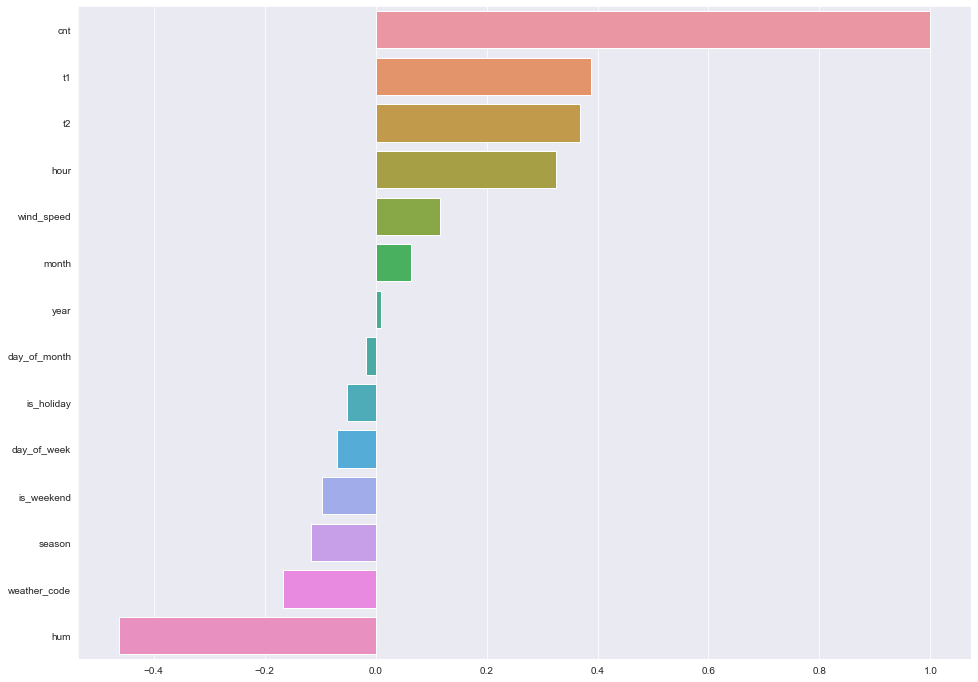

In [29]:
#with seaborn
plt.figure(figsize=(16,12))
sns.barplot(x = df.corr().cnt.sort_values(ascending=False).values, y=df.corr().cnt.sort_values(ascending=False).index);

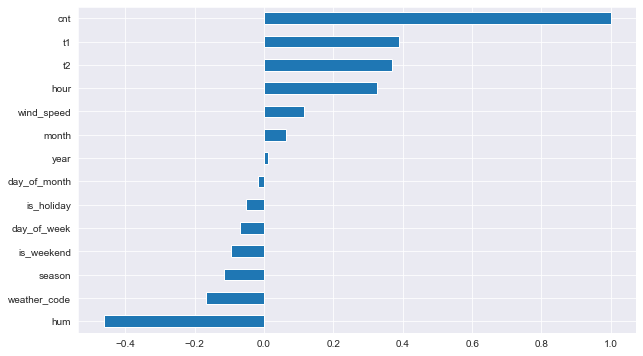

In [30]:
#with pandas

plt.figure(figsize=(10,6))
df.corr().cnt.sort_values().plot.barh()
plt.show()

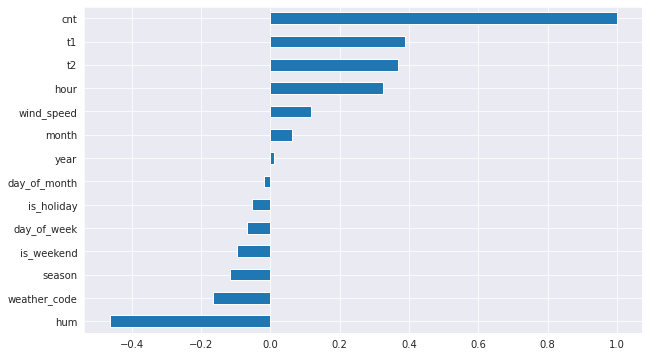

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

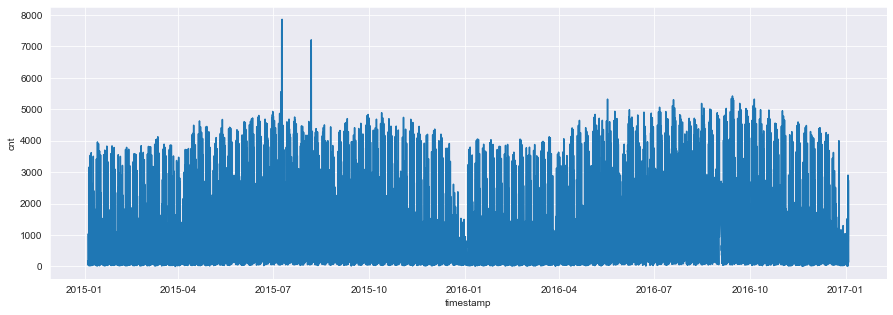

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df, x = df.index, y= df.cnt);

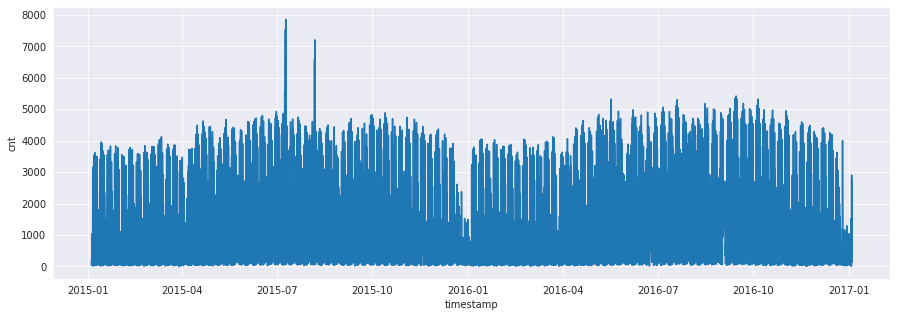

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [32]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [33]:
df.corr().loc[:,['cnt']].values

array([[ 1.        ],
       [ 0.38879845],
       [ 0.36903479],
       [-0.46290096],
       [ 0.11629523],
       [-0.16663276],
       [-0.0516983 ],
       [-0.09649912],
       [-0.11618023],
       [ 0.01004604],
       [ 0.06375725],
       [-0.01788673],
       [-0.06868785],
       [ 0.32442347]])

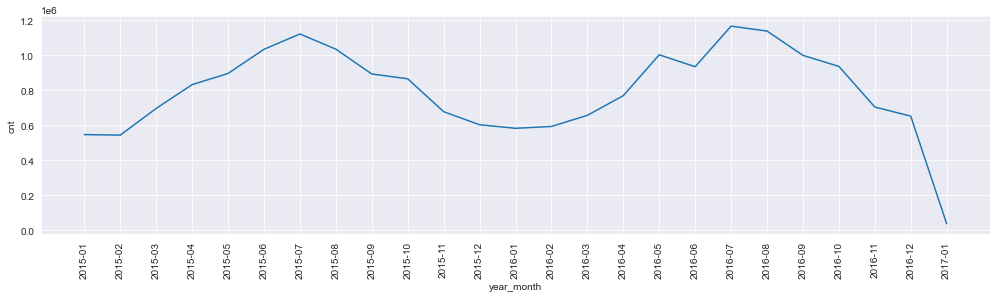

In [34]:
# with lineplot 
plt.figure(figsize=(17,4))
sns.lineplot(data = df, x = "year_month", y = "cnt", ci = None, estimator = sum)
plt.xticks(rotation = 90)
plt.show()

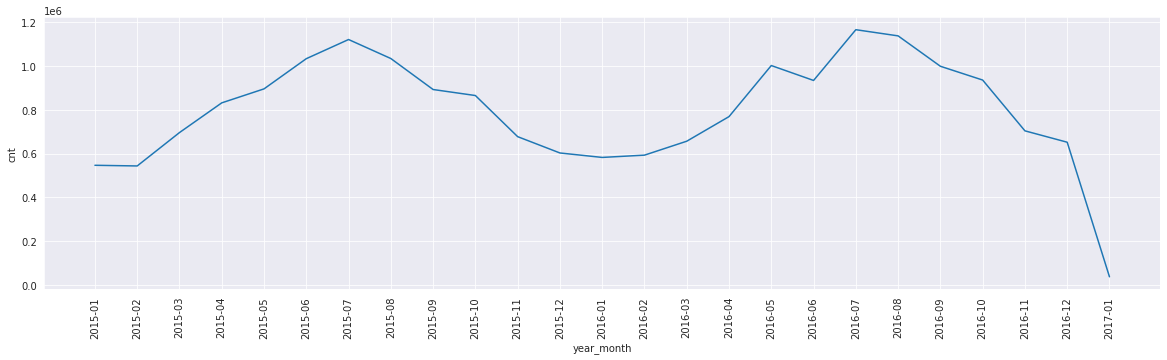

In [ ]:
# with lineplot


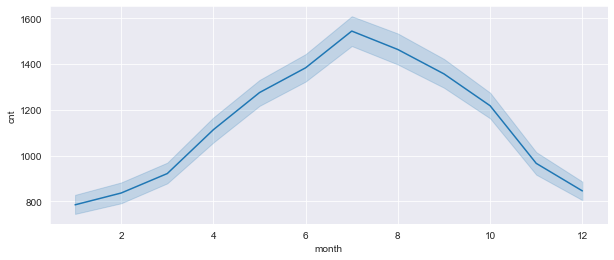

In [35]:
# with lineplot
plt.figure(figsize=(10,4))
sns.lineplot(data = df, x = 'month', y = 'cnt');

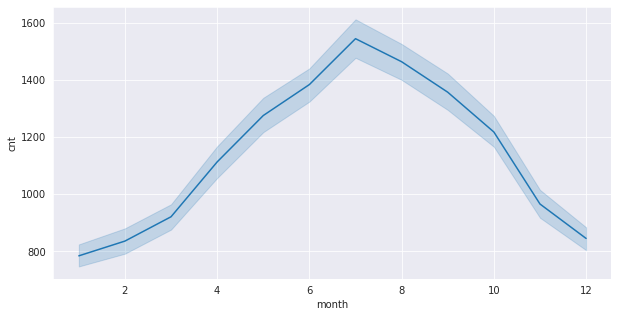

In [ ]:
# with lineplot


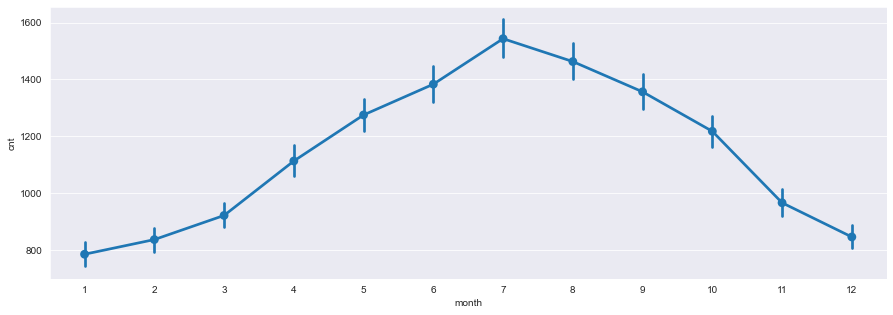

In [36]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(data=df,x="month",y="cnt")
plt.show()

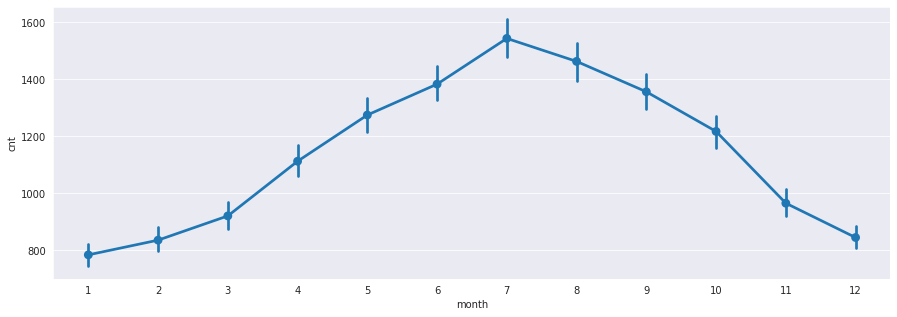

In [ ]:
# with pointplot


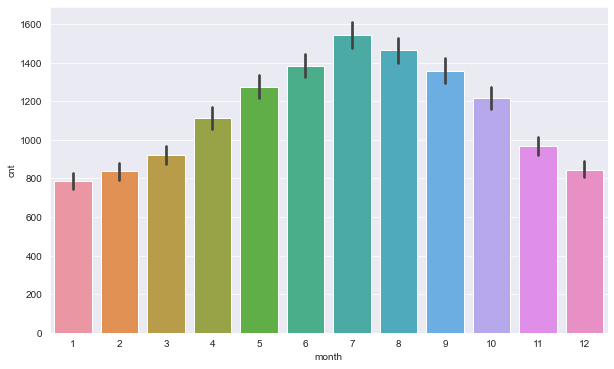

In [38]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="month",y="cnt")
plt.show()

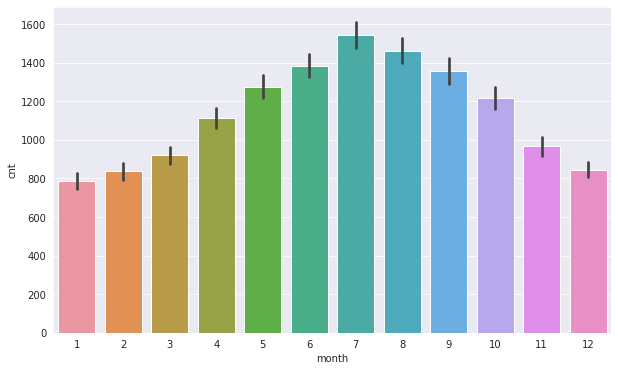

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

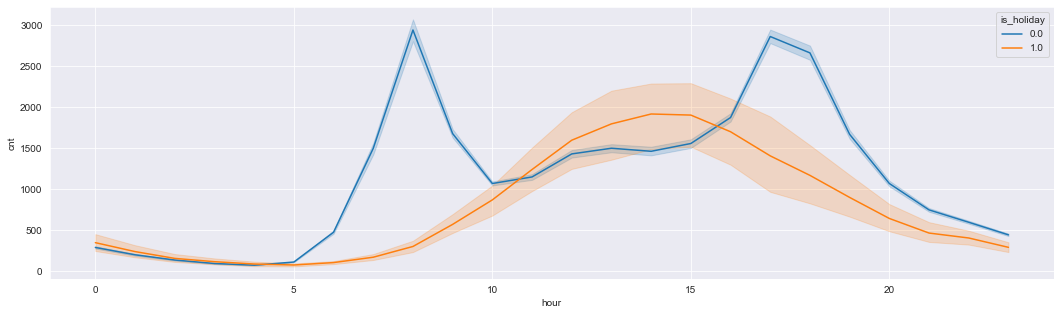

In [39]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(18,5))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "is_holiday")
plt.show()

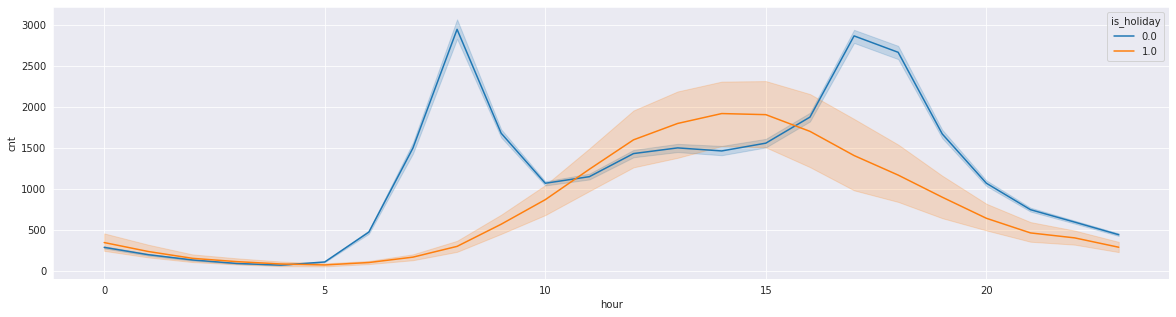

In [ ]:
# with lineplot (*whether it is a holiday or not*)


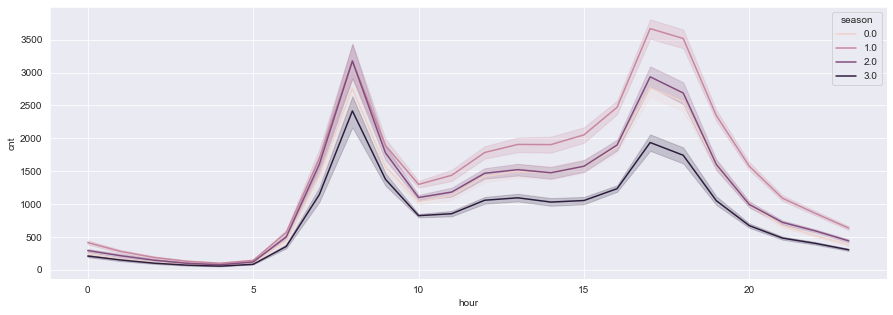

In [40]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(15,5))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "season")
plt.show()

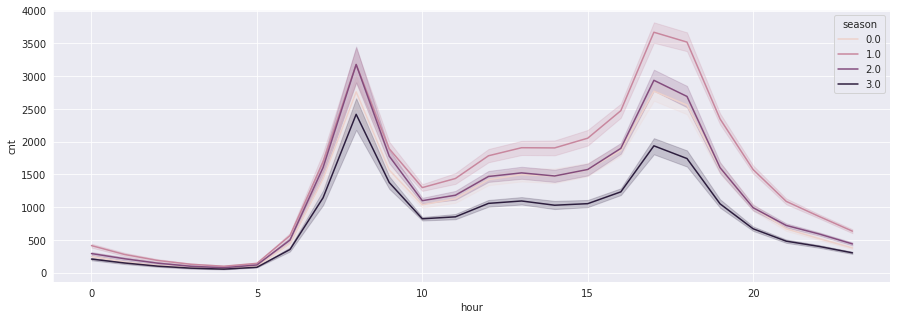

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


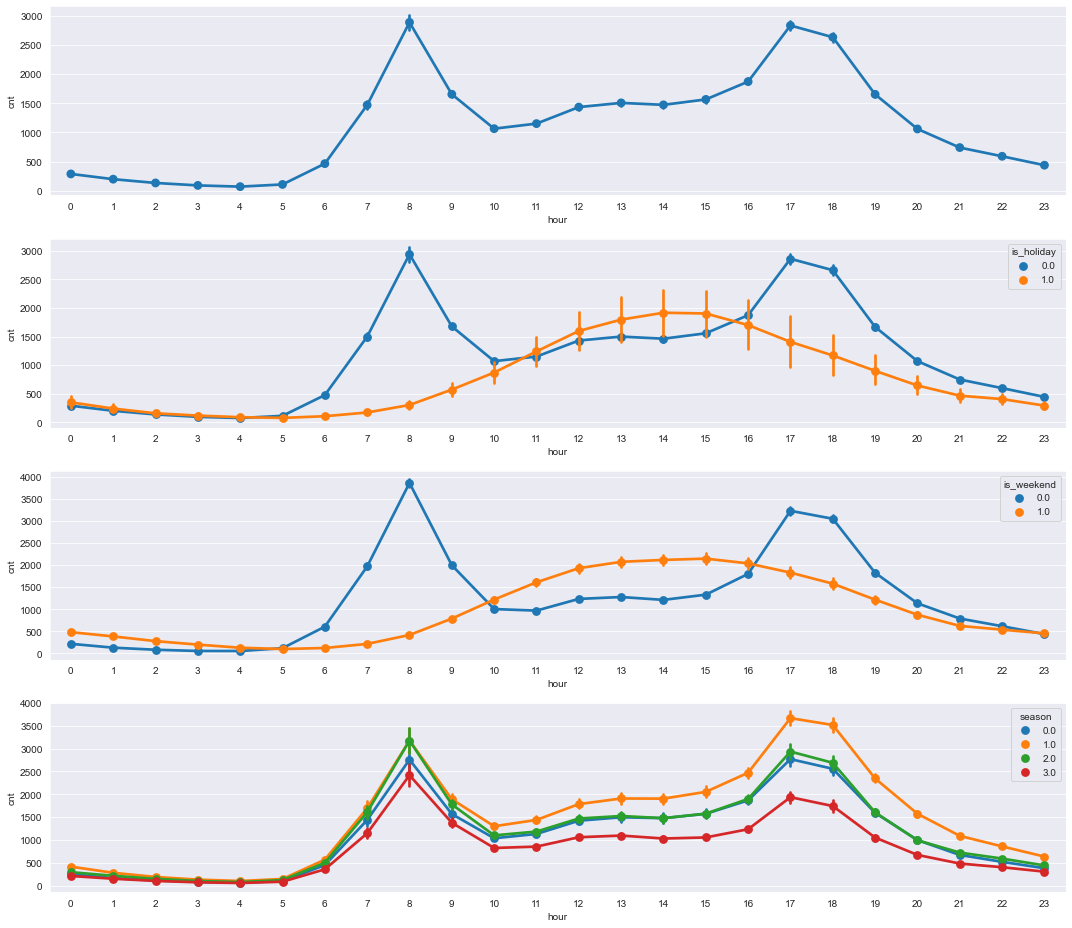

In [41]:
# with pointplot
fig, ax= plt.subplots(4,1, figsize=(15,13))
sns.pointplot(data=df, x="hour", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt",hue="is_holiday",ax=ax[1])
sns.pointplot(data=df, x="hour", y="cnt",hue="is_weekend",ax=ax[2])
sns.pointplot(data=df, x="hour", y="cnt",hue="season",ax=ax[3])
plt.tight_layout()

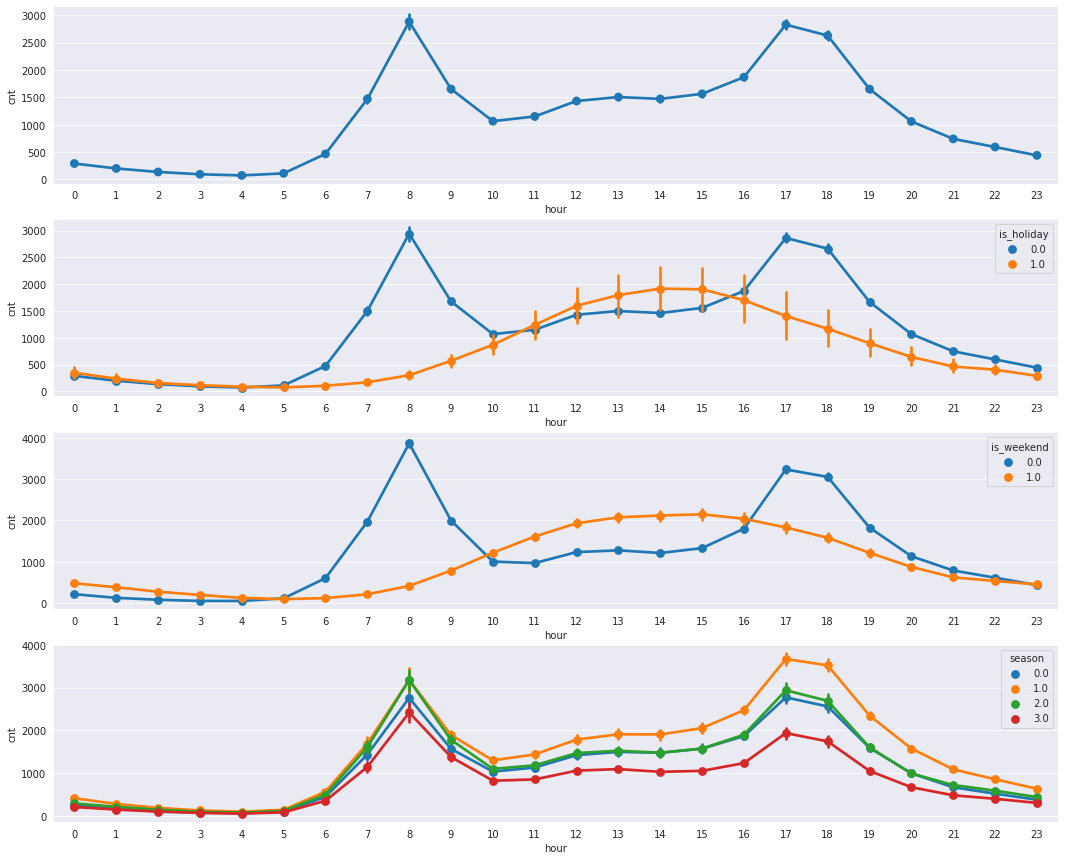

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [35]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01,2017,1,3,0,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,0,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,0,21


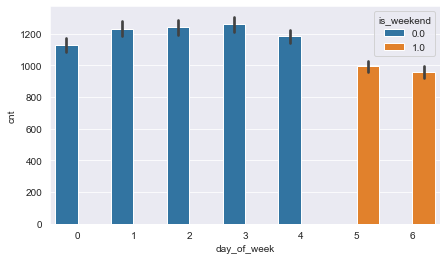

In [42]:
# with barplot
plt.figure(figsize=(7,4))
sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_weekend");

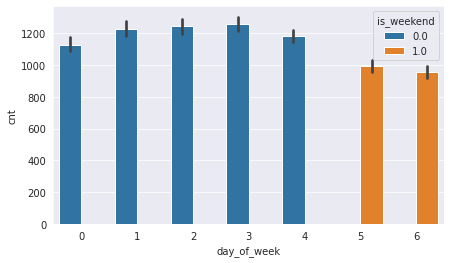

In [ ]:
# with barplot


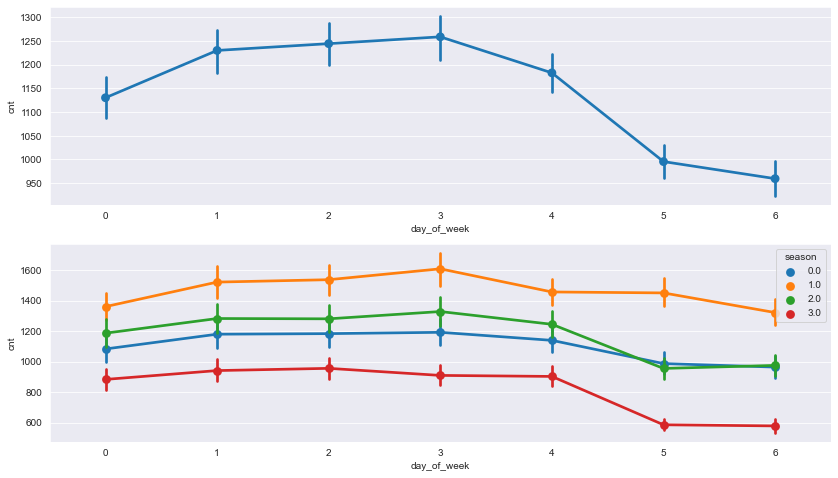

In [43]:
fig , ax = plt.subplots(2,1, figsize =(14,8))
sns.pointplot(data=df,x="day_of_week", y="cnt", ax = ax[0])
sns.pointplot(data=df,x="day_of_week", y="cnt", hue = "season", ax = ax[1]);

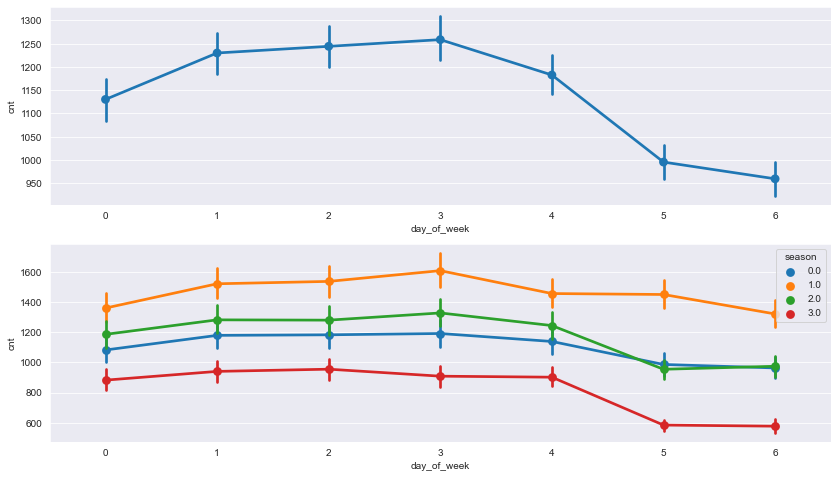

In [67]:
# with pointplot


### 13.Plot bike shares by day of month

In [44]:
df.groupby("day_of_month")[["cnt"]].mean().T.astype("int")

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


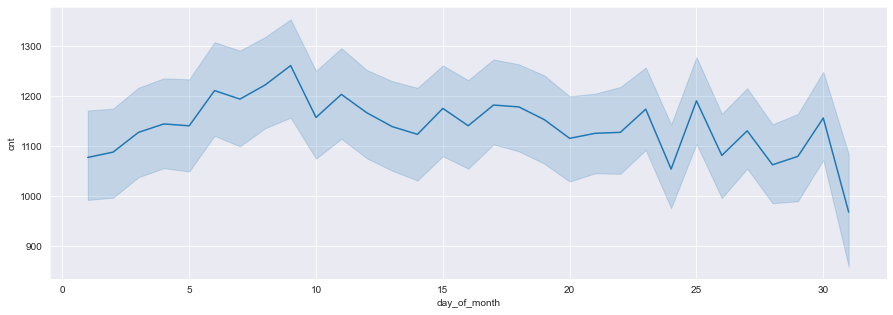

In [45]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x = "day_of_month", y = "cnt");

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


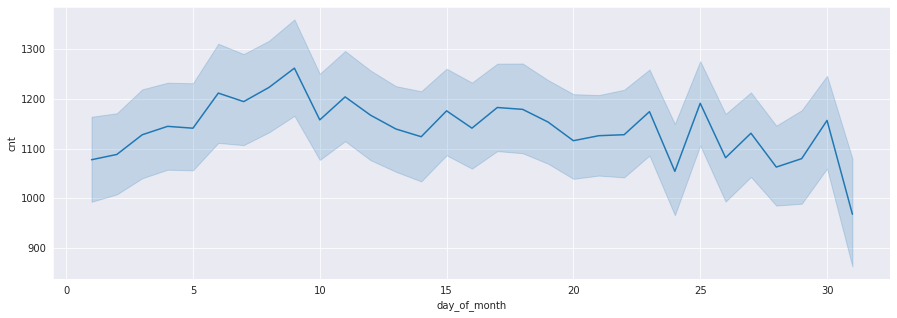

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

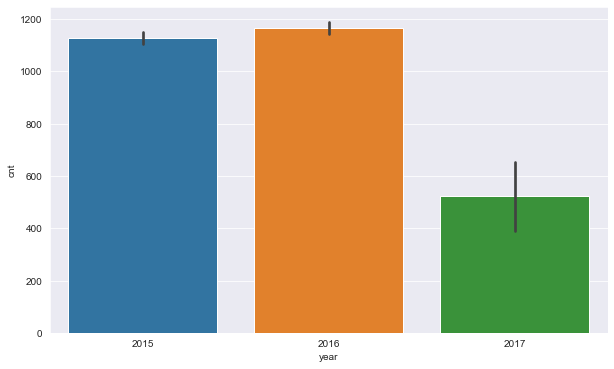

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x = "year", y = "cnt");

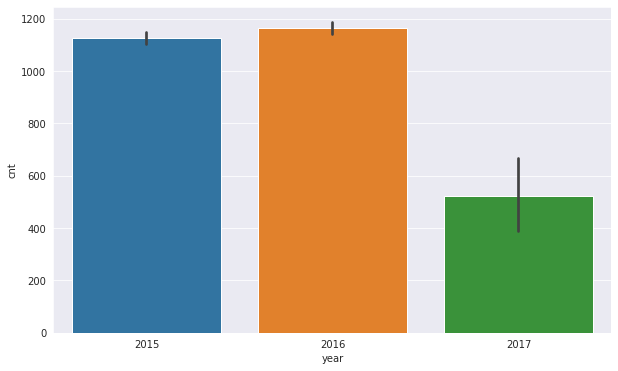

In [ ]:
# with barplot


In [88]:
raife = df[(df.is_holiday == 1)]

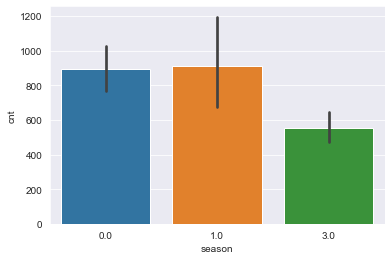

In [89]:
sns.barplot(data=raife, x="season", y="cnt");

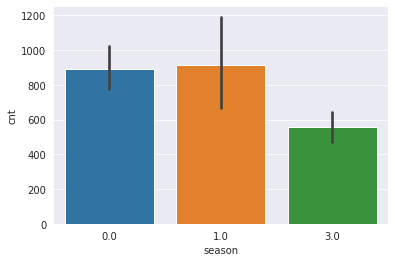

In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [63]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [240]:
df[["is_weekend"]]

,is_weekend
timestamp,
2015-01-04 00:00:00,1.0
2015-01-04 01:00:00,1.0
2015-01-04 02:00:00,1.0
2015-01-04 03:00:00,1.0
2015-01-04 04:00:00,1.0
...,...
2017-01-03 19:00:00,0.0
2017-01-03 20:00:00,0.0
2017-01-03 21:00:00,0.0


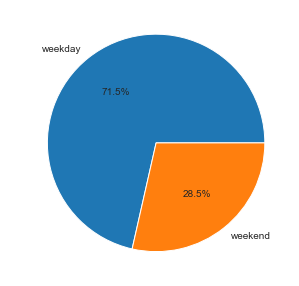

In [80]:
plt.figure(figsize=(5,5))

labels = ['weekday', 'weekend']
df.is_weekend.value_counts().plot.pie(autopct="%.1f%%", labels=labels);
plt.ylabel(" ");

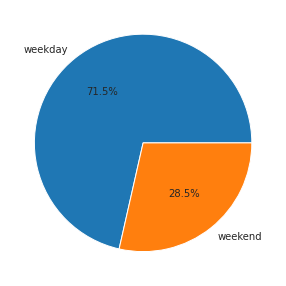

In [ ]:
# pie chart

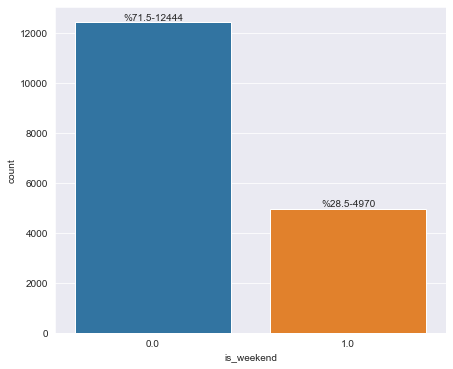

In [132]:
bölüm = df.is_weekend.value_counts().sum()/100
plt.figure(figsize=(7,6))
sns.countplot(data = df, x = "is_weekend");
for index,value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"%{value/bölüm:.3}-{value}", ha="center", va="bottom")

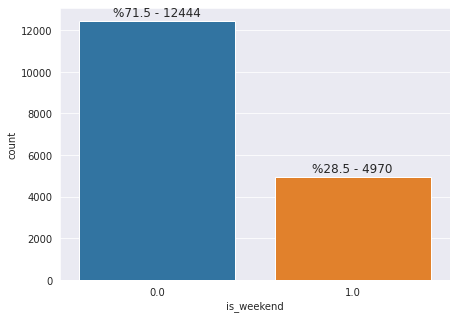

In [ ]:
# with countplot


### 16.Plot the distribution of weather code by seasons

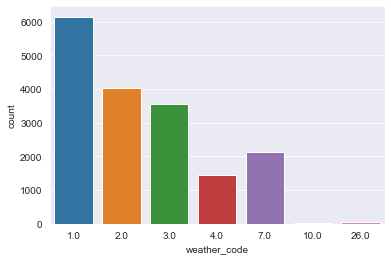

In [134]:
sns.countplot(data = df, x = "weather_code");

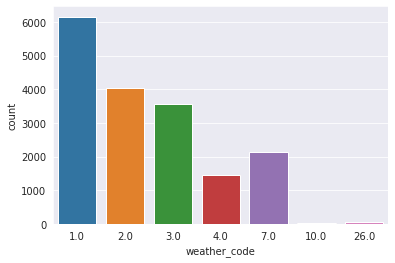

In [ ]:
# with countplot


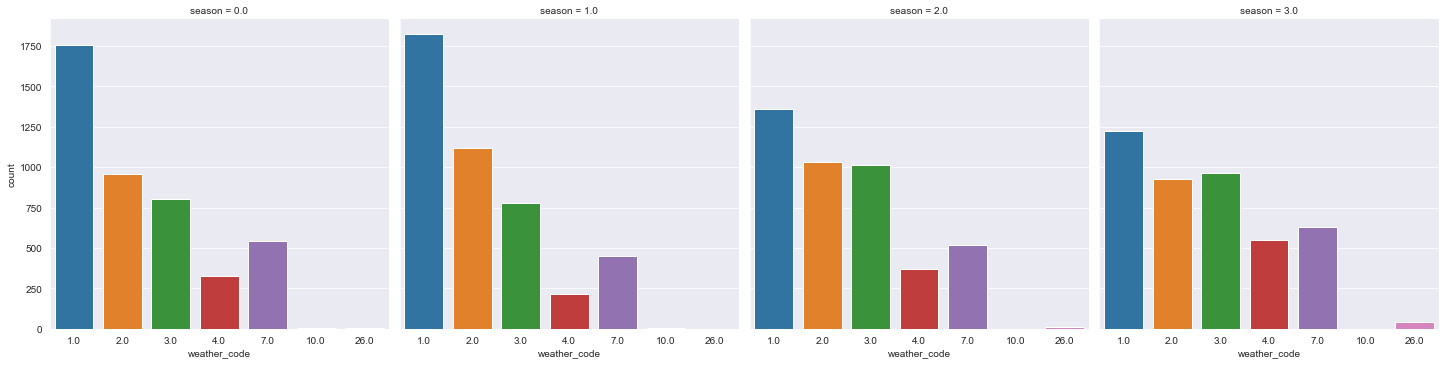

In [136]:
sns.catplot(kind = "count", data = df, x = "weather_code", col = "season");

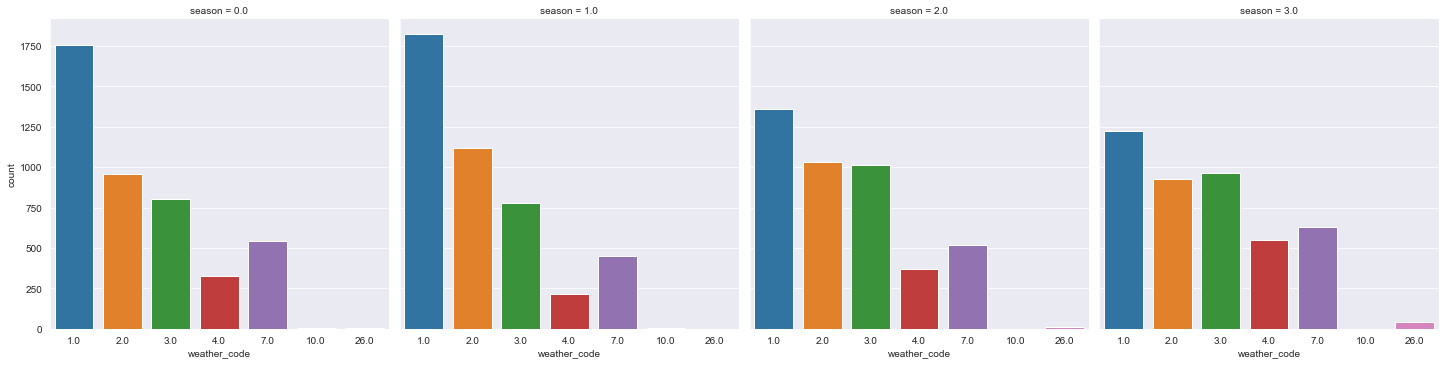

In [139]:
sns.catplot(x = "weather_code", col = "season", col_wrap = 4, data = df, kind="count");

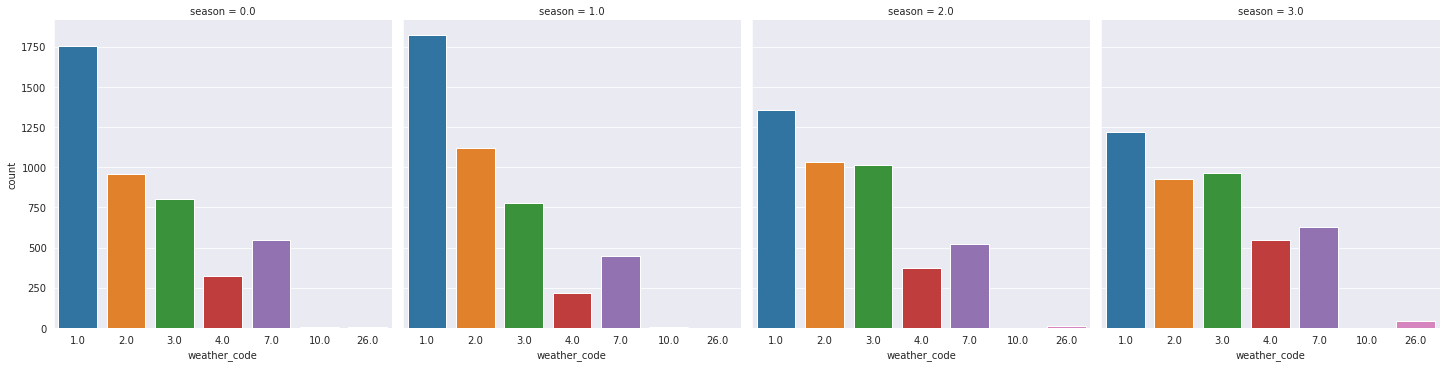

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

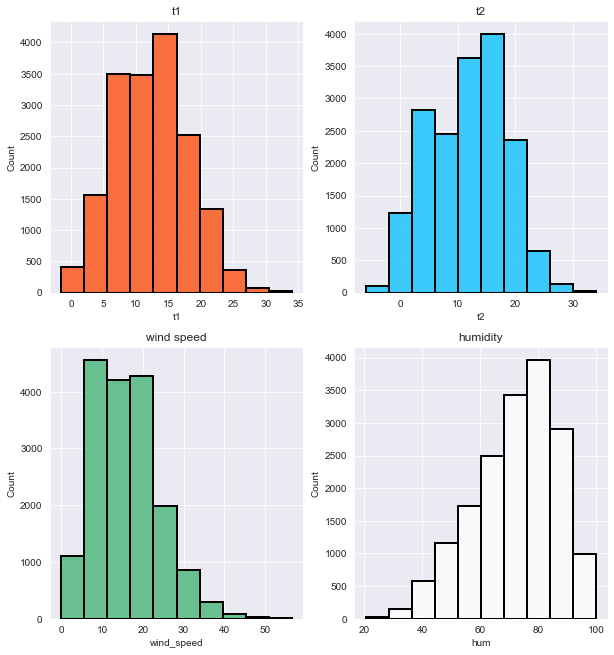

In [174]:
fig , ax = plt.subplots(2,2,figsize=(10,11))
sns.histplot(data=df, x="t1", bins=10, color="orangered", edgecolor = "black", lw = 2, ax=ax[0,0]).set_title("t1")
sns.histplot(data=df, x="t2", bins=10, color="deepskyblue", edgecolor = "black", lw = 2, ax=ax[0,1]).set_title("t2")
sns.histplot(data=df, x="wind_speed", bins=10, color="mediumseagreen", edgecolor = "black", lw = 2, ax=ax[1,0]).set_title("wind speed")
sns.histplot(data=df, x="hum", bins=10, color="white", edgecolor = "black", lw = 2, ax=ax[1,1]).set_title("humidity")
plt.show()

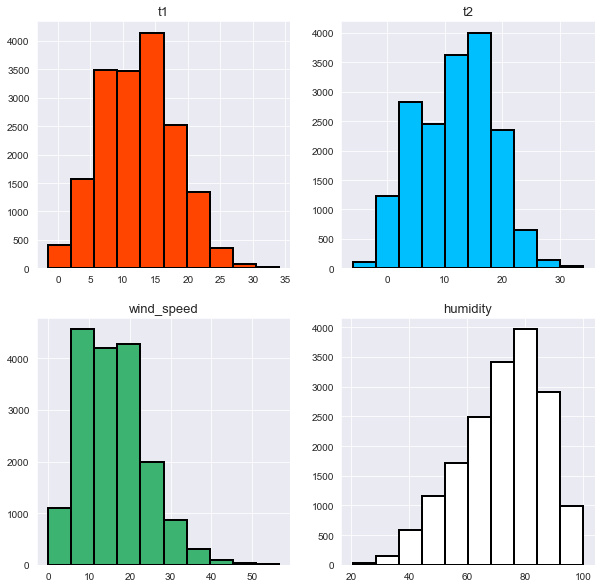

In [169]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

axes[0][0].hist(df["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)

axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)

plt.show()

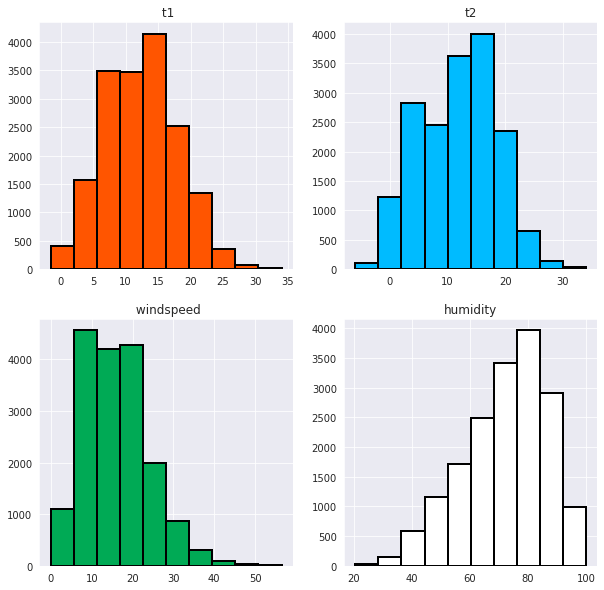

In [ ]:
# matplotlip hist


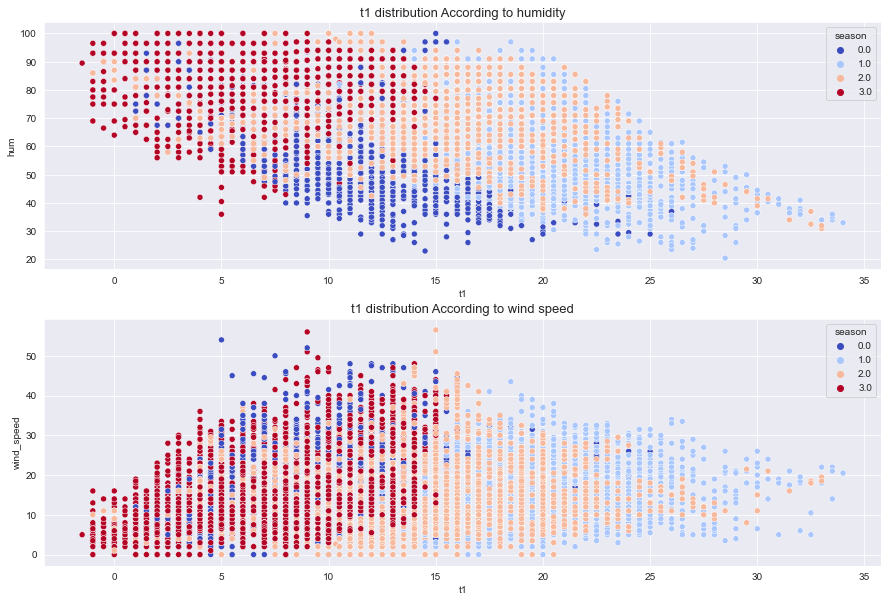

In [162]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data = df, x = "t1", y = "hum", palette = "coolwarm", hue = "season", ax = ax[0]).set_title("t1 distribution According to humidity", fontsize = 13)
sns.scatterplot(data = df, x = "t1", y = "wind_speed", palette = "coolwarm", hue = "season", ax = ax[1]).set_title("t1 distribution According to wind speed", fontsize = 13);

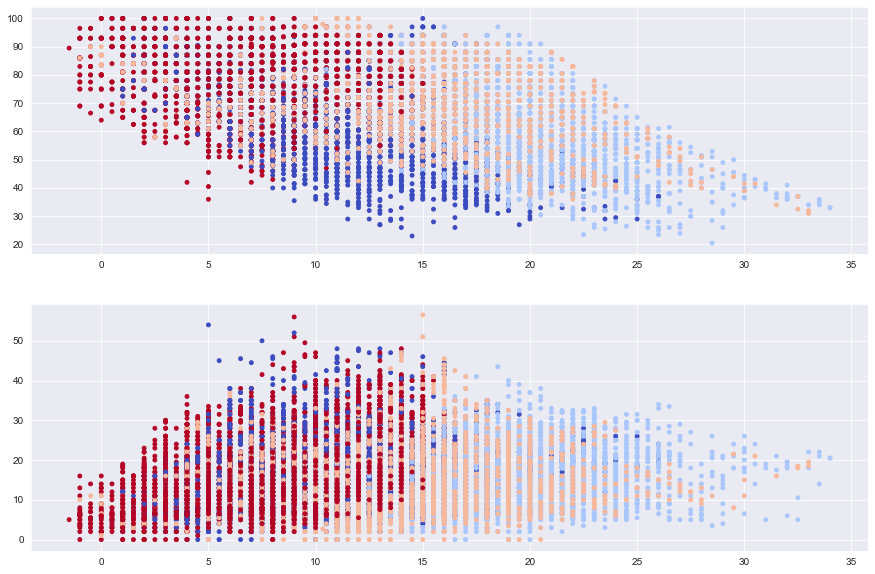

In [167]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15);

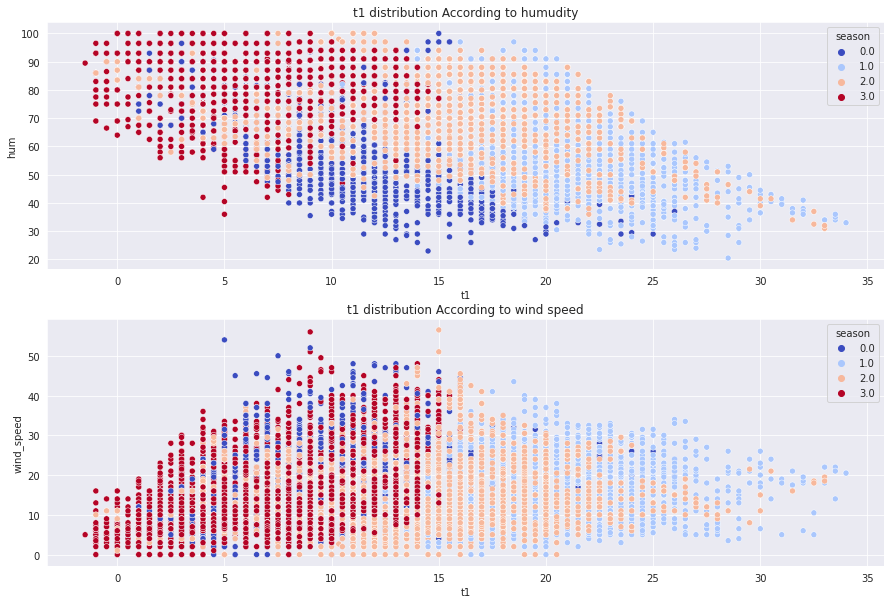

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___